#### Imports

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import wrangle
import explore

# Exercises

#### 1. Load your zillow dataset.



In [2]:
df = wrangle.get_zillow_data()

Found CSV


In [3]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
df = wrangle.wrangle_zillow(df)

In [5]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county,orange,ventura
4,4,2.0,3633,296425,2005,6941.39,la,0,0
6,3,4.0,1620,847770,2011,10244.94,la,0,0
7,3,2.0,2077,646760,1926,7924.68,la,0,0
18,3,1.0,1244,169471,1950,2532.88,la,0,0
19,3,2.0,1300,233266,1950,3110.99,la,0,0


In [6]:
train, validate, test = wrangle.split_function(df)

In [7]:
print(f'      df: {df.shape}')
print(f'   train: {train.shape}')
print(f'validate: {validate.shape}')
print(f'    test: {test.shape}')

      df: (2010708, 9)
   train: (1206424, 9)
validate: (402142, 9)
    test: (402142, 9)


In [8]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county,orange,ventura
1752514,3,1.5,1179,159188,1957,2022.20,orange,1,0
1400740,3,2.0,1663,456862,1952,5603.99,la,0,0
1278943,3,2.0,1133,208719,1963,2514.38,orange,1,0
1105547,3,3.0,2562,555988,1969,6375.61,la,0,0
355207,4,2.0,2747,673720,1935,8411.60,la,0,0


#### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.



In [9]:
# train2 = train[['sqft', 'tax_value']]
# train2

In [10]:
baseline = train.tax_value.mean()
baseline

358552.1404075184

In [11]:
train['baseline'] = baseline

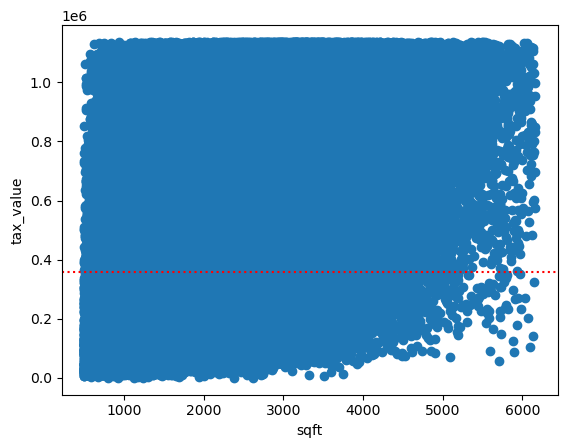

In [12]:
plt.scatter(train.sqft, train.tax_value)
plt.axhline(baseline, ls=':', color='red')

plt.xlabel('sqft')
plt.ylabel('tax_value')
plt.show()

In [13]:
#Here is some sample code to get you started:

# make the thing
lr = LinearRegression()

In [14]:
# fit the thing
lr.fit(train[['sqft']], train.tax_value)

LinearRegression()

In [15]:
# use the thing
predictions = lr.predict(train[['sqft']])
predictions

array([260873.47904915, 344666.7459739 , 252909.65615961, ...,
       524372.14074226, 313330.83416939, 391930.30355748])

In [16]:
train['yhat'] = lr.predict(train[['sqft']])

In [17]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county,orange,ventura,baseline,yhat
1752514,3,1.5,1179,159188,1957,2022.20,orange,1,0,358552.140408,260873.479049
1400740,3,2.0,1663,456862,1952,5603.99,la,0,0,358552.140408,344666.745974
1278943,3,2.0,1133,208719,1963,2514.38,orange,1,0,358552.140408,252909.656160
1105547,3,3.0,2562,555988,1969,6375.61,la,0,0,358552.140408,500307.545489
355207,4,2.0,2747,673720,1935,8411.60,la,0,0,358552.140408,532335.963632


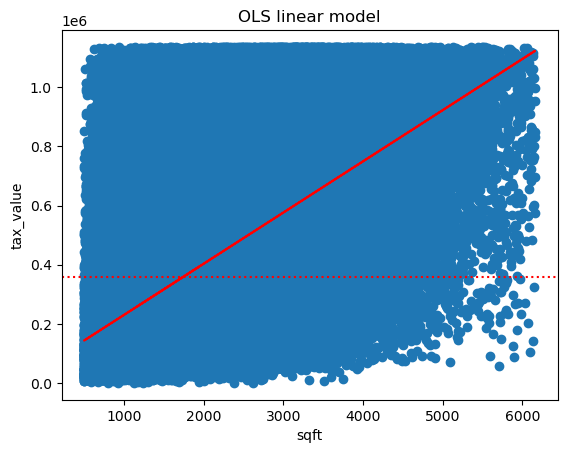

In [18]:
plt.scatter(train.sqft, train.tax_value)
plt.plot(train.sqft, train.yhat, color='red')
plt.axhline(baseline, ls=':', color='red')

plt.xlabel('sqft')
plt.ylabel('tax_value')
plt.title('OLS linear model')
plt.show()

#### 3. Plot the residuals for the linear regression model that you made.



In [19]:
train['baseline_residual'] = train.tax_value - train.baseline

In [20]:
train['residuals'] = train.tax_value - train.yhat

In [21]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county,orange,ventura,baseline,yhat,baseline_residual,residuals
1752514,3,1.5,1179,159188,1957,2022.20,orange,1,0,358552.140408,260873.479049,-199364.140408,-101685.479049
1400740,3,2.0,1663,456862,1952,5603.99,la,0,0,358552.140408,344666.745974,98309.859592,112195.254026
1278943,3,2.0,1133,208719,1963,2514.38,orange,1,0,358552.140408,252909.656160,-149833.140408,-44190.656160
1105547,3,3.0,2562,555988,1969,6375.61,la,0,0,358552.140408,500307.545489,197435.859592,55680.454511
355207,4,2.0,2747,673720,1935,8411.60,la,0,0,358552.140408,532335.963632,315167.859592,141384.036368


In [22]:
train.baseline_residual.sum()

-2.92118638753891e-05

In [23]:
train.residuals.sum()

7.81891867518425e-06

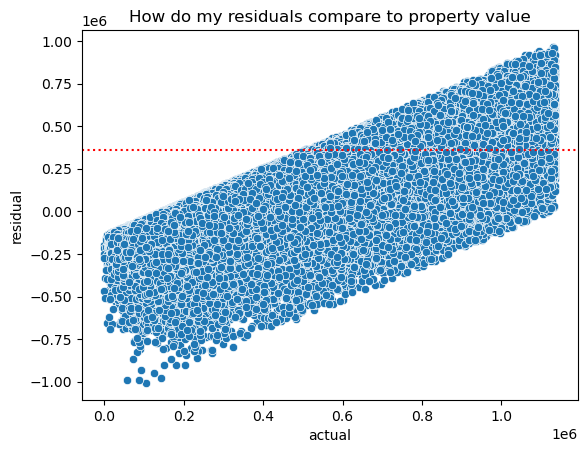

In [71]:
sns.scatterplot(data=train, x=train.tax_value, y=train.residuals)

plt.axhline(baseline, ls=':', color='red')

plt.xlabel('actual')
plt.ylabel('residual')
plt.title('How do my residuals compare to property value')
plt.show()

In [25]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county,orange,ventura,baseline,yhat,baseline_residual,residuals
1752514,3,1.5,1179,159188,1957,2022.20,orange,1,0,358552.140408,260873.479049,-199364.140408,-101685.479049
1400740,3,2.0,1663,456862,1952,5603.99,la,0,0,358552.140408,344666.745974,98309.859592,112195.254026
1278943,3,2.0,1133,208719,1963,2514.38,orange,1,0,358552.140408,252909.656160,-149833.140408,-44190.656160
1105547,3,3.0,2562,555988,1969,6375.61,la,0,0,358552.140408,500307.545489,197435.859592,55680.454511
355207,4,2.0,2747,673720,1935,8411.60,la,0,0,358552.140408,532335.963632,315167.859592,141384.036368


#### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



***SSE = Sum of Squared Error***

In [26]:
sse = mean_squared_error(train.tax_value, train.yhat) * len(train)
print(f'SSE:', sse)

SSE: 4.904492323122166e+16


***MSE = Mean Squared Error***

In [27]:
mse = mean_squared_error(train.tax_value, train.yhat)
print(f'MSE:', mse)

MSE: 40653139552.28151


***ESS***

In [28]:
ess = sum((train.yhat - train.tax_value.mean()) ** 2)
print(f'ESS:', ess)

ESS: 1.7645539869454222e+16


***TSS***

In [29]:
tss = ((train.tax_value - train.yhat.mean()) ** 2).sum()
print(f'TSS:', tss)

TSS: 6.669046310065247e+16


***RMSE = Root Mean Squared Error***

In [30]:
rmse = mean_squared_error(train.tax_value, train.yhat, squared=False)
print(f'RMSE:', rmse)

RMSE: 201626.23726162603


In [31]:
print(f'SSE:', sse)
print(f'ESS:', ess)
print(f'TSS:', tss)
print(f'MSE:', mse)
print(f'RMSE:', rmse)

SSE: 4.904492323122166e+16
ESS: 1.7645539869454222e+16
TSS: 6.669046310065247e+16
MSE: 40653139552.28151
RMSE: 201626.23726162603


#### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).



***SSE = Sum of Squared Error***

In [32]:
sse_baseline = mean_squared_error(train.tax_value, train.baseline) * len(train)
print(f'SSE Baseline:', sse_baseline)

SSE Baseline: 6.669046310065244e+16


***MSE = Mean Squared Error***

In [33]:
mse_baseline = mean_squared_error(train.tax_value, train.baseline)
print(f'MSE baseline:', mse_baseline)

MSE baseline: 55279456559.76045


***RMSE = Root Mean Squared Error***

In [34]:
rmse_baseline = mean_squared_error(train.tax_value, train.baseline, squared=False)
print(f'RMSE Baseline:', rmse_baseline)

RMSE Baseline: 235115.83647164318


In [35]:
print(f'SSE Baseline:', sse_baseline)
print(f'MSE baseline:', mse_baseline)
print(f'RMSE Baseline:', rmse_baseline)

SSE Baseline: 6.669046310065244e+16
MSE baseline: 55279456559.76045
RMSE Baseline: 235115.83647164318


#### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [36]:
print(f'         SSE:',sse)
print(f'SSE Baseline:', sse_baseline)
print()
if sse < sse_baseline:
    print("My model performs better than the baseline model")
else:
    print("My model performs worse than the baseline model")

         SSE: 4.904492323122166e+16
SSE Baseline: 6.669046310065244e+16

My model performs better than the baseline model


#### 7. What is the amount of variance explained in your model?



In [37]:
r2_score(train.tax_value, train.yhat)

0.2645886540448712

#### 8. Is your model better than the baseline model?



Not really. My model is better than baseline but it isn't that good

#### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot


In [38]:
def plot_residuals(y, yhat):
    '''
    send in: 
    i.e. y = train.tax_value
      yhat = train.yhat
    '''
    
    residuals = y - yhat
    sns.scatterplot(y=residuals, x=y, hue=y, size=y)
    
    baseline = y.mean()
    plt.axhline(baseline, ls=':', color='red')
    
    plt.xlabel('Actual')
    plt.ylabel('Residual')
    plt.title('Residual Plot')
    plt.show()
    

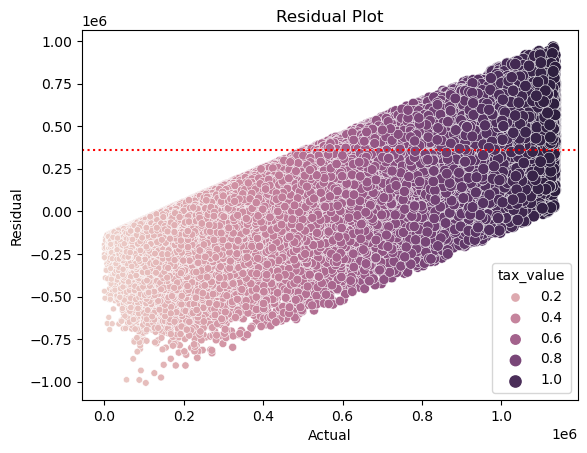

In [39]:
plot_residuals(train.tax_value, train.yhat)

- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)

In [57]:
def regression_errors(y, yhat):
    '''
    send in: 
    i.e.
    y = train.tax_value
    yhat = train.yhat
    return:
    SSE, ESS, TSS, MSE, RMSE
    '''
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE ** .5
    
    ESS = ((yhat - y.mean()) ** 2).sum()
    TSS = ESS + SSE
    
    
    
    print(f'Metric  Model_error')
    print(f'SSE:   ', SSE)
    print(f'ESS:   ', ESS)
    print(f'TSS:   ', TSS)
    print(f'MSE:   ', MSE)
    print(f'RMSE:  ', RMSE)
    
    return SSE, ESS, TSS, MSE, RMSE

In [58]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(train.tax_value, train.yhat)

Metric  Model_error
SSE:    4.904492323122166e+16
ESS:    1.7645539869442098e+16
TSS:    6.669046310066376e+16
MSE:    40653139552.28151
RMSE:   201626.23726162603


- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [59]:
def baseline_mean_errors(y):
    '''
    send in: 
    df
    y = target variable as string
    You NEED to have a baseline column in df for this function to work
    return SSE_baseline, MSE_baseline, RMSE_baseline
    '''
    
    baseline = np.repeat(y.mean(), len(y))
    MSE_baseline = mean_squared_error(y, baseline)
    SSE_baseline = MSE_baseline * len(y)
    RMSE_baseline = MSE_baseline ** .5
    
    
    print(f'                 error')
    print(f'SSE Baseline: ', sse_baseline)
    print(f'MSE baseline: ', mse_baseline)
    print(f'RMSE Baseline:', rmse_baseline)
    
    return SSE_baseline, MSE_baseline, RMSE_baseline

In [60]:
SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(train.tax_value)

                 error
SSE Baseline:  6.669046310065244e+16
MSE baseline:  55279456559.76045
RMSE Baseline: 235115.83647164318


- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [44]:
df_eval = pd.DataFrame(np.array(['SSE', 'MSE', 'RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline', 'MSE_baseline', 'RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error

# Check if the model is better than the baseline
if all(df_eval.error_delta < 0):
    print("The model is better than the baseline")
    is_better_than_baseline = True
else:
    print("The model is not better than the baseline")
    is_better_than_baseline = False

df_eval

The model is better than the baseline


,metric,model_error,error_delta
0,SSE,4.904492e+16,-1.764554e+16
1,MSE,4.065314e+10,-1.462632e+10
2,RMSE,2.016262e+05,-3.348960e+04


In [65]:
def better_than_baseline(y, yhat, baseline):
    sse_model = np.sum((y - yhat) ** 2)
    sse_baseline = np.sum((y - baseline) ** 2)
    return sse_model < sse_baseline

In [67]:
better_than_baseline(train.tax_value, train.yhat, baseline)

True

In [ ]:
def categorize_bathrooms(bathrooms):
    if bathrooms.is_integer():
        return 'full'
    else:
        return 'half'
# create a new column with the categorized bathrooms
train['bathroom_type'] = train['bathroom'].apply(categorize_bathrooms)

In [76]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county,orange,ventura,baseline,yhat,baseline_residual,residuals
1752514,3,1.5,1179,159188,1957,2022.20,orange,1,0,358552.140408,260873.479049,-199364.140408,-101685.479049
1400740,3,2.0,1663,456862,1952,5603.99,la,0,0,358552.140408,344666.745974,98309.859592,112195.254026
1278943,3,2.0,1133,208719,1963,2514.38,orange,1,0,358552.140408,252909.656160,-149833.140408,-44190.656160
1105547,3,3.0,2562,555988,1969,6375.61,la,0,0,358552.140408,500307.545489,197435.859592,55680.454511
355207,4,2.0,2747,673720,1935,8411.60,la,0,0,358552.140408,532335.963632,315167.859592,141384.036368


In [75]:
train[['sqft', 'tax_value']]

,sqft,tax_value
1752514,1179,159188
1400740,1663,456862
1278943,1133,208719
1105547,2562,555988
355207,2747,673720
...,...,...
1022529,2738,628776
360193,1940,598996
1443844,2701,446552
519116,1482,105685


In [ ]:
baseline = train.tax_value.mean()
train['baseline'] = baseline

lr = LinearRegression()
lr.fit(train[['sqft']], train.tax_value)
predictions = lr.predict(train[['sqft']])
train['yhat'] = lr.predict(train[['sqft']])
train['baseline_residual'] = train.tax_value - train.baseline
train['residuals'] = train.tax_value - train.yhat



In [ ]:
def regression_function(train, target_var, ind_var):
    '''
    
    '''
    
    baseline = train[target_var].mean()
    train['baseline'] = baseline
    
    lr = LinearRegression()
    lr.fit(train[[ind_var]], train[target_var])
    predictions = lr.predict(train[[ind_var]])
    
    train['yhat'] = lr.predict(train[[ind_var]])
    train['baseline_residual'] = train[target_var] - train.baseline
    train['residuals'] = train[target_var] - train.yhat